# DSI Instructor Task: Part 1

### Python Coding and Data Set

1. [Import packages & load Headers and Data](#step1)
2. [Check top 5 rows for each field](#step2)
3. [Check for data quality by looking at types and nulls](#step3)
4. [Separate into different variables and Describe the data](#step4)
5. [Analyse diagnosis distribution](#step5)
6. [Compactness Mean and Median](#step6)
7. [Bootstrap](#step7)

### Exploratory Analysis
8. [Analyse all numerical variables correlation using a heatmap](#step8)
9. [Group Correlated Variables and select best classifier of each based on violin and swarm plots](#step9)
10. [Feature selection](#step10)

### Modeling
11. [Modeling](#step11)

### Explanation
12. [To Technical Audiences](#step12)
13. [To Non-Technical Audiences](#step13)



# DSI Instructor Task: Part 2

1. [To Technical Audiences](#step13)
2. [To Non-Technical Audiences](#step14)


-----------------------------------------------------
# DSI Instructor Task: Part 1
# Python Coding and Data Set

### Import packages & load Headers and Data <a class="anchor" id="step1"></a>

 #### Load in the data file and header file provided


In [1]:

#install packages (replace package_name)  using below code
    #!pip install package_name
#import packages for data 
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import random


pd.set_option("display.max_columns", None)
#load headers
url_h = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt"
response = requests.get(url_h)
column_headers = list(response.text.split())
df = pd.DataFrame(columns=column_headers)


#load data and add headers
url_data = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv"
data = pd.read_csv(url_data,header=None, names=list(df))
#shape of data (rows, columns)
print ('Size of data table')
print ('(rows, columns)')
print(data.shape)





Size of data table
(rows, columns)
(569, 32)


### Check top 5 rows for each field<a class="anchor" id="step2"></a>

In [28]:
#check top 5 rows
print(data.head(5))

         ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38        122.80   
1    842517         M        20.57            17.77        132.90   
2  84300903         M        19.69            21.25        130.00   
3  84348301         M        11.42            20.38         77.58   
4  84358402         M        20.29            14.34        135.10   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   
3         386.1           0.14250        0.28390          0.2414   
4        1297.0           0.10030        0.13280          0.1980   

   perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  \
0             0.14710           0.2419    0.07871         1.0950      0.9053   
1             0.

### Check for data quality by looking at types and nulls <a class="anchor" id="step3"></a>
Plot Nulls

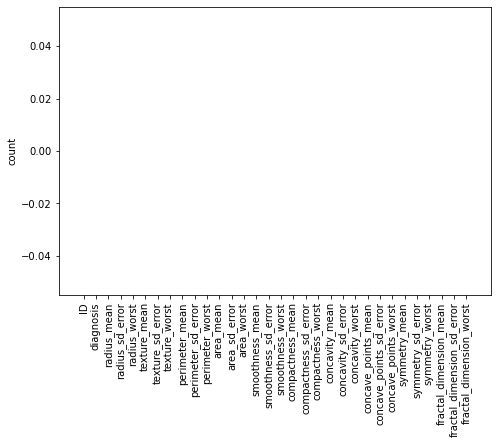

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

In [27]:
# find nulls count
nulls = data.isnull().sum()

# plot bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('count')
plt.xticks(rotation='vertical')
ax.bar(data.columns, nulls)
plt.show()

#check for nulls and datatypes
print(data.info())

- No nulls present
- ID is an Integer and is of no relevance in the data as it is only the identifier for the row
- diagnosis is a categorical variable and should be the target of the analysis

### Separate into different variables and Describe the data <a class="anchor" id="step4"></a>

In [4]:
cols = data.columns
y = data.diagnosis
x = data.drop(['ID','diagnosis'],axis=1)

print(x.describe(include ='all'))

       radius_mean  radius_sd_error  radius_worst  texture_mean  \
count   569.000000       569.000000    569.000000    569.000000   
mean     14.127292        19.289649     91.969033    654.889104   
std       3.524049         4.301036     24.298981    351.914129   
min       6.981000         9.710000     43.790000    143.500000   
25%      11.700000        16.170000     75.170000    420.300000   
50%      13.370000        18.840000     86.240000    551.100000   
75%      15.780000        21.800000    104.100000    782.700000   
max      28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        569.000000     569.000000      569.000000          569.000000   
mean           0.096360       0.104341        0.088799            0.048919   
std            0.014064       0.052813        0.079720            0.038803   
min            0.052630       0.019380        0.000000            0.000000   
25%   

### Analyse diagnosis distribution <a class="anchor" id="step5"></a>

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

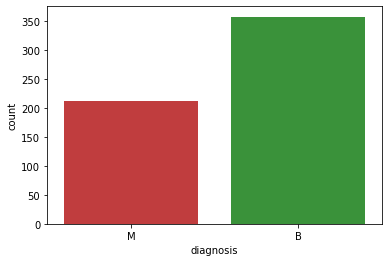

In [5]:
print (y.value_counts())
sns.countplot(x = y, palette = ['tab:red', 'tab:green']) 

B (benign) is the more abundant result


Lets proceed to check mean and median for smoothness and compactness on the categories

### Smoothness Mean and Median

  diagnosis  smoothness_mean
0         B         2.000321
1         M         4.323929


<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

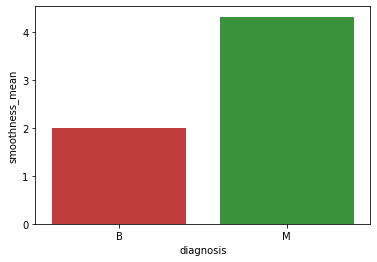

In [6]:
sm = data[['diagnosis','smoothness_mean']]
sm_mean = sm.groupby('diagnosis', as_index=False)['smoothness_mean'].mean()
print(sm_mean)
sns.barplot(x='diagnosis',y='smoothness_mean', data=sm_mean, ci=False,palette = ['tab:red', 'tab:green'])

  diagnosis  smoothness_mean
0         B           1.8510
1         M           3.6795


[Text(0, 0.5, 'smoothness_median')]

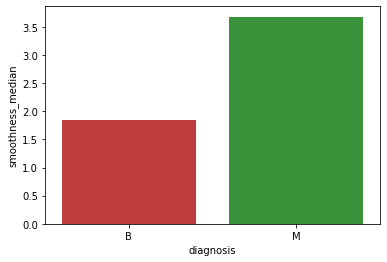

In [7]:
sm_median = sm.groupby('diagnosis', as_index=False)['smoothness_mean'].median()
print(sm_median)
smax = sns.barplot(x='diagnosis',y='smoothness_mean', data=sm_median, ci=False,palette = ['tab:red', 'tab:green'])
smax.set( ylabel='smoothness_median')

### Compactness Mean and Median <a class="anchor" id="step6"></a>

  diagnosis  compactness_mean
0         B          0.021438
1         M          0.032281


<AxesSubplot:xlabel='diagnosis', ylabel='compactness_mean'>

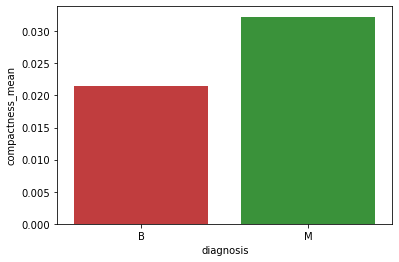

In [8]:
cm = data[['diagnosis','compactness_mean']]
cm_mean = cm.groupby('diagnosis', as_index=False)['compactness_mean'].mean()
print(cm_mean)
sns.barplot(x='diagnosis',y='compactness_mean', data=cm_mean, ci=False,palette = ['tab:red', 'tab:green'])

  diagnosis  compactness_mean
0         B           0.01631
1         M           0.02859


[Text(0, 0.5, 'compactness_median')]

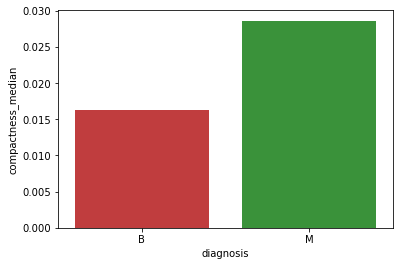

In [9]:
cm_median = cm.groupby('diagnosis', as_index=False)['compactness_mean'].median()
print(cm_median)
cmax = sns.barplot(x='diagnosis',y='compactness_mean', data=cm_median, ci=False,palette = ['tab:red', 'tab:green'])
cmax.set( ylabel='compactness_median')

Benign and Malignant tumors differ from both Smoothness and Compactness:
- Malignant mean and median for Smoothness is within double the value than that of Benign 
- Malignant mean for Compactness is 1.5x the value than that of Benign
- Malignant median for Compactness is 1.75x the value than that of Benign
 
 Malignant tumors have a higher value for both Smoothness and Compactness than that of Benign values. 

## Bootstrap <a class="anchor" id="step7"></a>


Creating a function to bootstrap data adding samples

In [33]:
from sklearn.utils import resample

def bootstrap (dataframe):
  
    sample_df=pd.DataFrame()
    for b in range(20):
        # making samples from the main data
        sample=resample(dataframe,n_samples = len(dataframe),replace=True)
        sample_df = pd.concat([sample_df,sample])
    
    return sample_df


The function is called below and creates a data sample with 20 repetitions

In [34]:
dataframe = data.drop(['ID'],axis=1)

samples=bootstrap(dataframe)
print ('Size of data table')
print ('(rows, columns)')
print(samples.shape)


Size of data table
(rows, columns)
(11380, 31)


Create a sample to test models

In [12]:
samples_cols = samples.columns
samples_y = samples.diagnosis
samples_x = samples.drop(['diagnosis'],axis=1)


------------------------------------------------------------------------------------------------------


# Exploratory Analysis




### Analyse all numerical variables correlation using a heatmap <a class="anchor" id="step8"></a>

<AxesSubplot:>

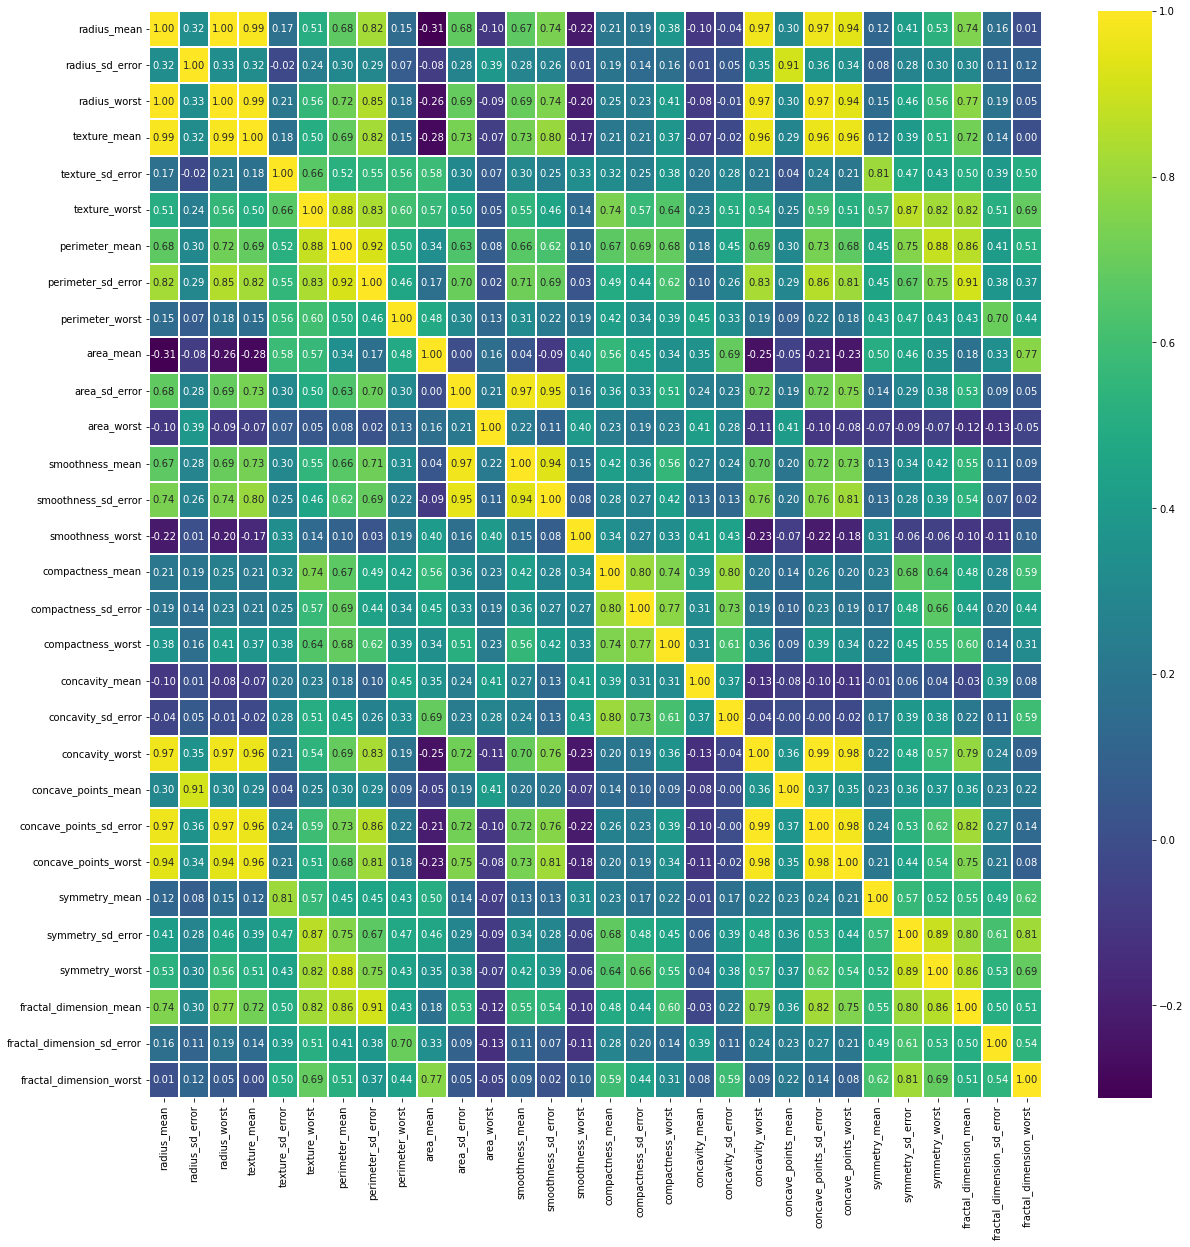

In [13]:
#heatmap correlation matrix 
a,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.25, fmt= '.2f',ax=ax ,  cmap='viridis')

### Group Correlated Variables and select best classifier of each based on violin and swarm plots
<a class="anchor" id="step9"></a>

As show in the heatmap above, there are 3 groups of highly (> 0.90) correlated variables.

Group 1
- radius_mean
- radius_worst 
- texture_mean
- concavity_worst
- concave_points_sd_error
- concave_points_worst

Group 2
- area_sd_error
- smoothness_mean 
- smoothness_sd_error

Group 3
- texture_worst
- perimeter_mean
- perimeter_sd_error
- symmetry_sd_error
- symmetry_worst
- fractal_dimension_mean

Group 4
- 'radius_sd_error'
- concave_points_mean

we will analyse the groups to find the best classifier and select 1 for each group, drop the rest


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'radius_worst'),
  Text(2, 0, 'texture_mean'),
  Text(3, 0, 'concavity_worst'),
  Text(4, 0, 'concave_points_sd_error'),
  Text(5, 0, 'concave_points_worst')])

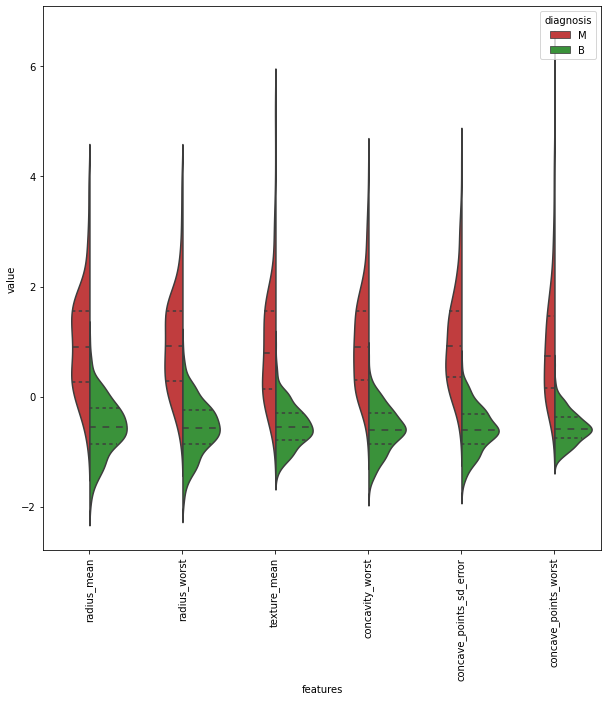

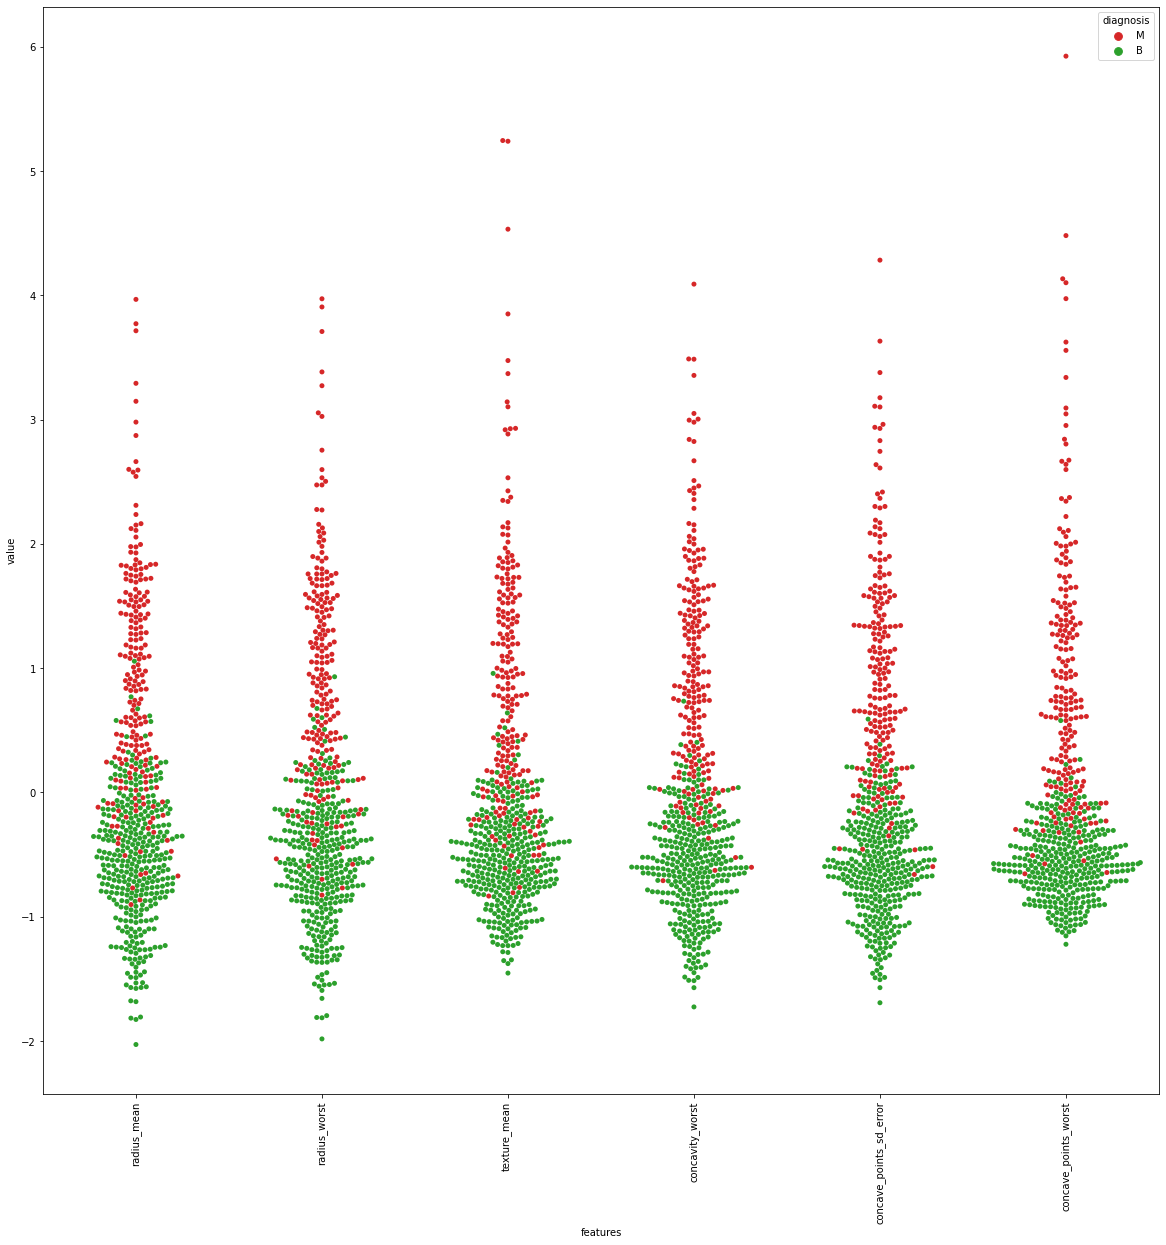

In [26]:
group1 = x[['radius_mean','radius_worst','texture_mean','concavity_worst','concave_points_sd_error','concave_points_worst']]

group1_d = y
group1_n_2 = (group1 - group1.mean()) / (group1.std())            
group1 = pd.concat([y,group1_n_2],axis=1)
group1 = pd.melt(group1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=group1,split=True, inner="quart",palette = ['tab:red', 'tab:green'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,20))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=group1,palette = ['tab:red', 'tab:green'])

plt.xticks(rotation=90)

Concavity_worst seems to be the best classifier for Group 1, given it shows more separation for each type. 

(array([0, 1, 2]),
 [Text(0, 0, 'area_sd_error'),
  Text(1, 0, 'smoothness_mean'),
  Text(2, 0, 'smoothness_sd_error')])

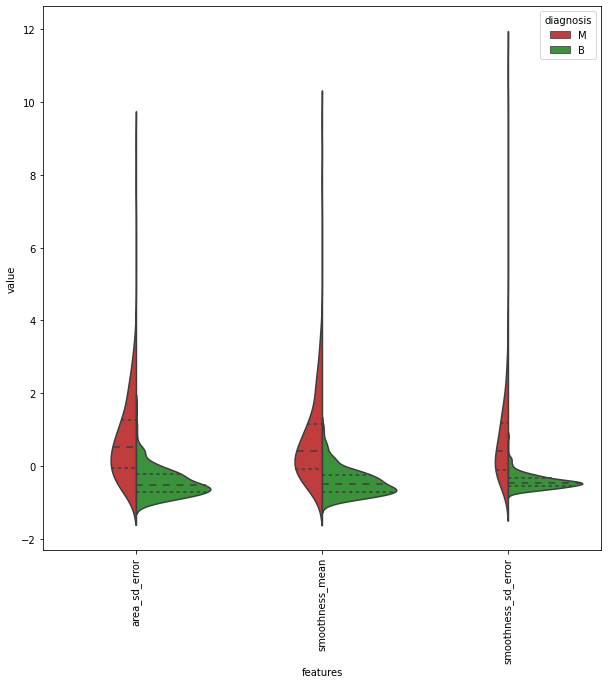

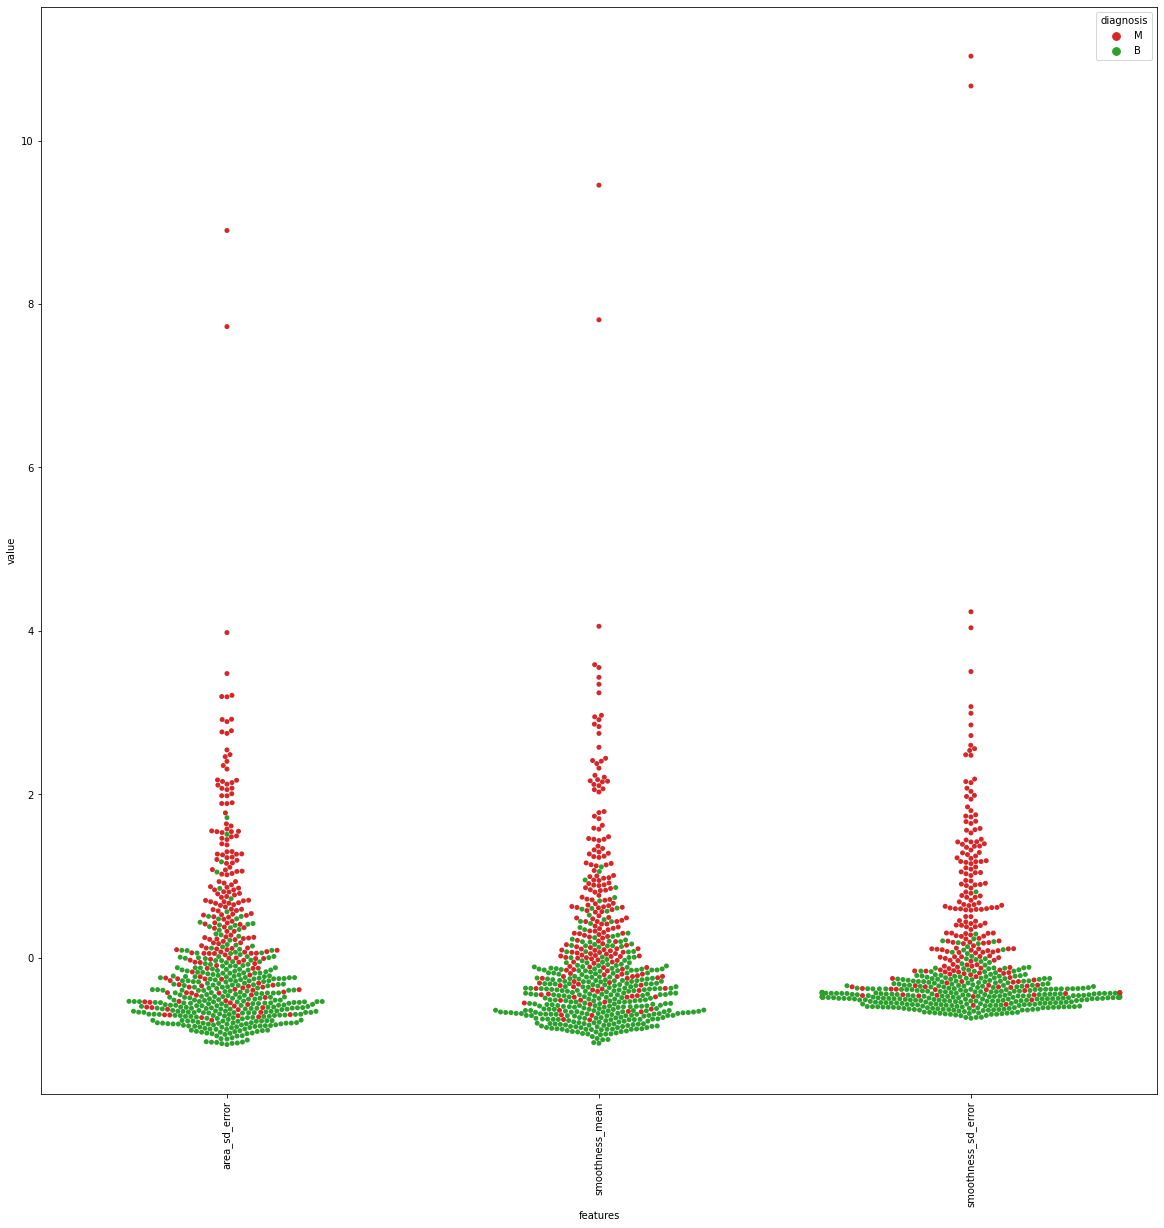

In [15]:
group2 = x[['area_sd_error','smoothness_mean','smoothness_sd_error']]

group2_d = y
group2_n_2 = (group2 - group2.mean()) / (group2.std())            
group2 = pd.concat([y,group2_n_2],axis=1)
group2 = pd.melt(group2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=group2,split=True, inner="quart",palette = ['tab:red', 'tab:green'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,20))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=group2,palette = ['tab:red', 'tab:green'])

plt.xticks(rotation=90)

smoothness_mean seems to be the best classifier for Group 2, given it shows the best separation for each type. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'perimeter_mean'),
  Text(1, 0, 'perimeter_sd_error'),
  Text(2, 0, 'symmetry_sd_error'),
  Text(3, 0, 'symmetry_worst'),
  Text(4, 0, 'fractal_dimension_mean')])

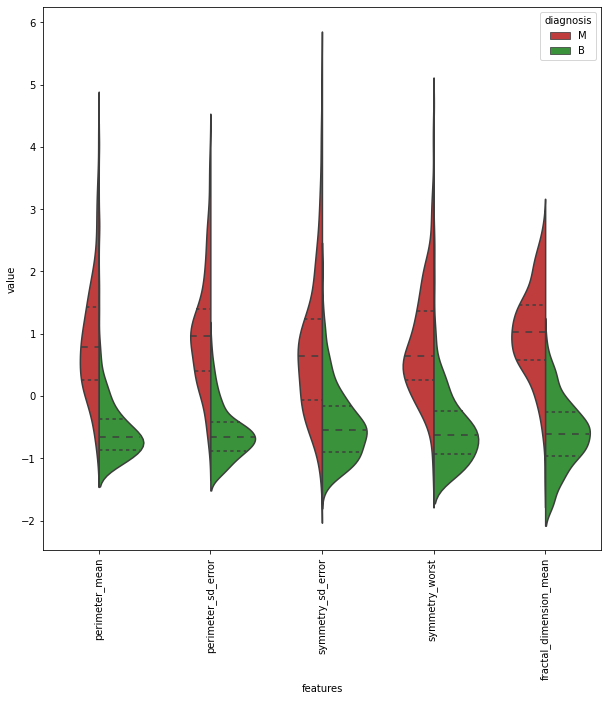

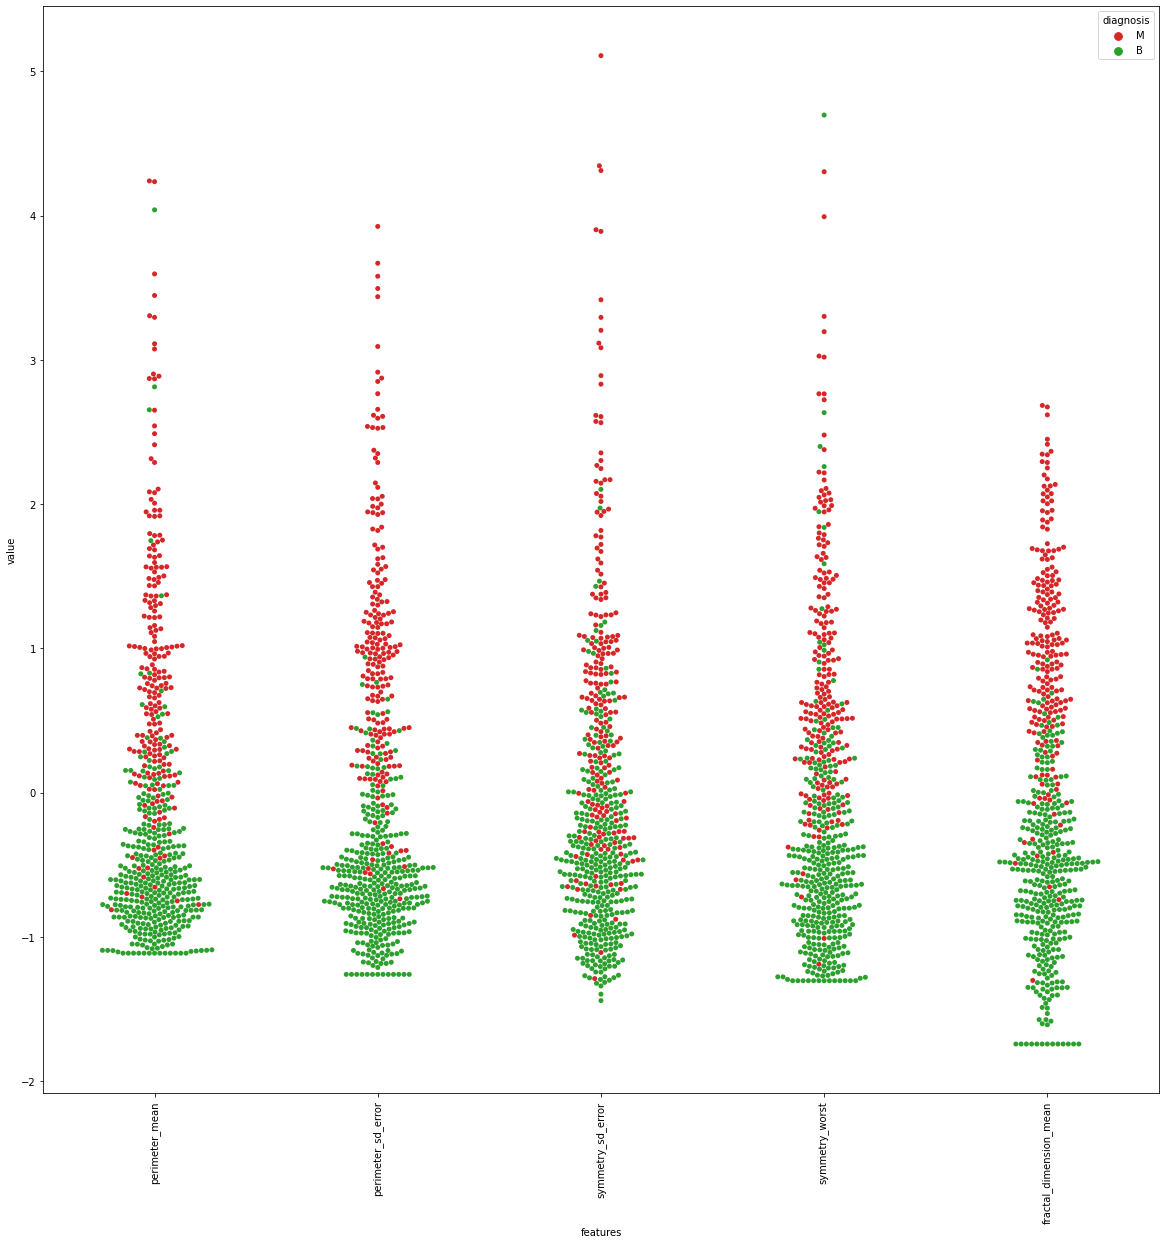

In [16]:
group3 = x[['perimeter_mean','perimeter_sd_error','symmetry_sd_error','symmetry_worst','fractal_dimension_mean']]

group3_d = y
group3_n_2 = (group3 - group3.mean()) / (group3.std())            
group3 = pd.concat([y,group3_n_2],axis=1)
group3 = pd.melt(group3,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=group3,split=True, inner="quart",palette = ['tab:red', 'tab:green'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,20))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=group3,palette = ['tab:red', 'tab:green'])

plt.xticks(rotation=90)

fractal_dimension_mean seems to be the best classifier for Group 3, given it shows the best separation for each type. 

(array([0, 1]),
 [Text(0, 0, 'radius_sd_error'), Text(1, 0, 'concave_points_mean')])

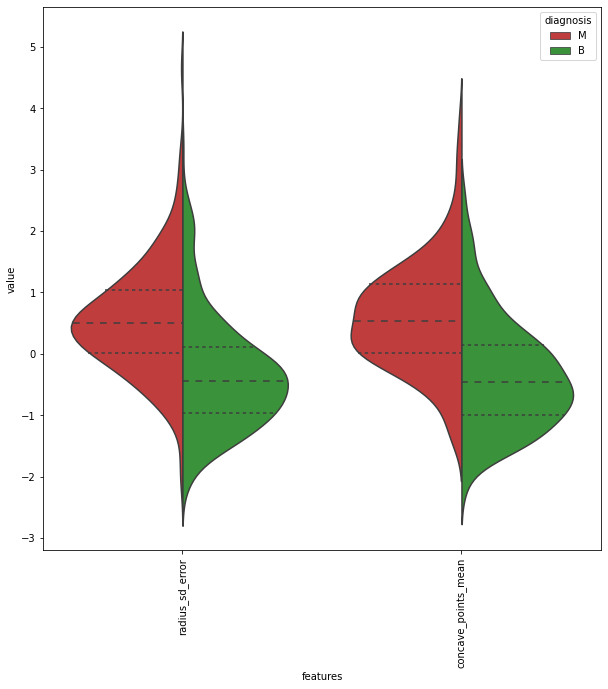

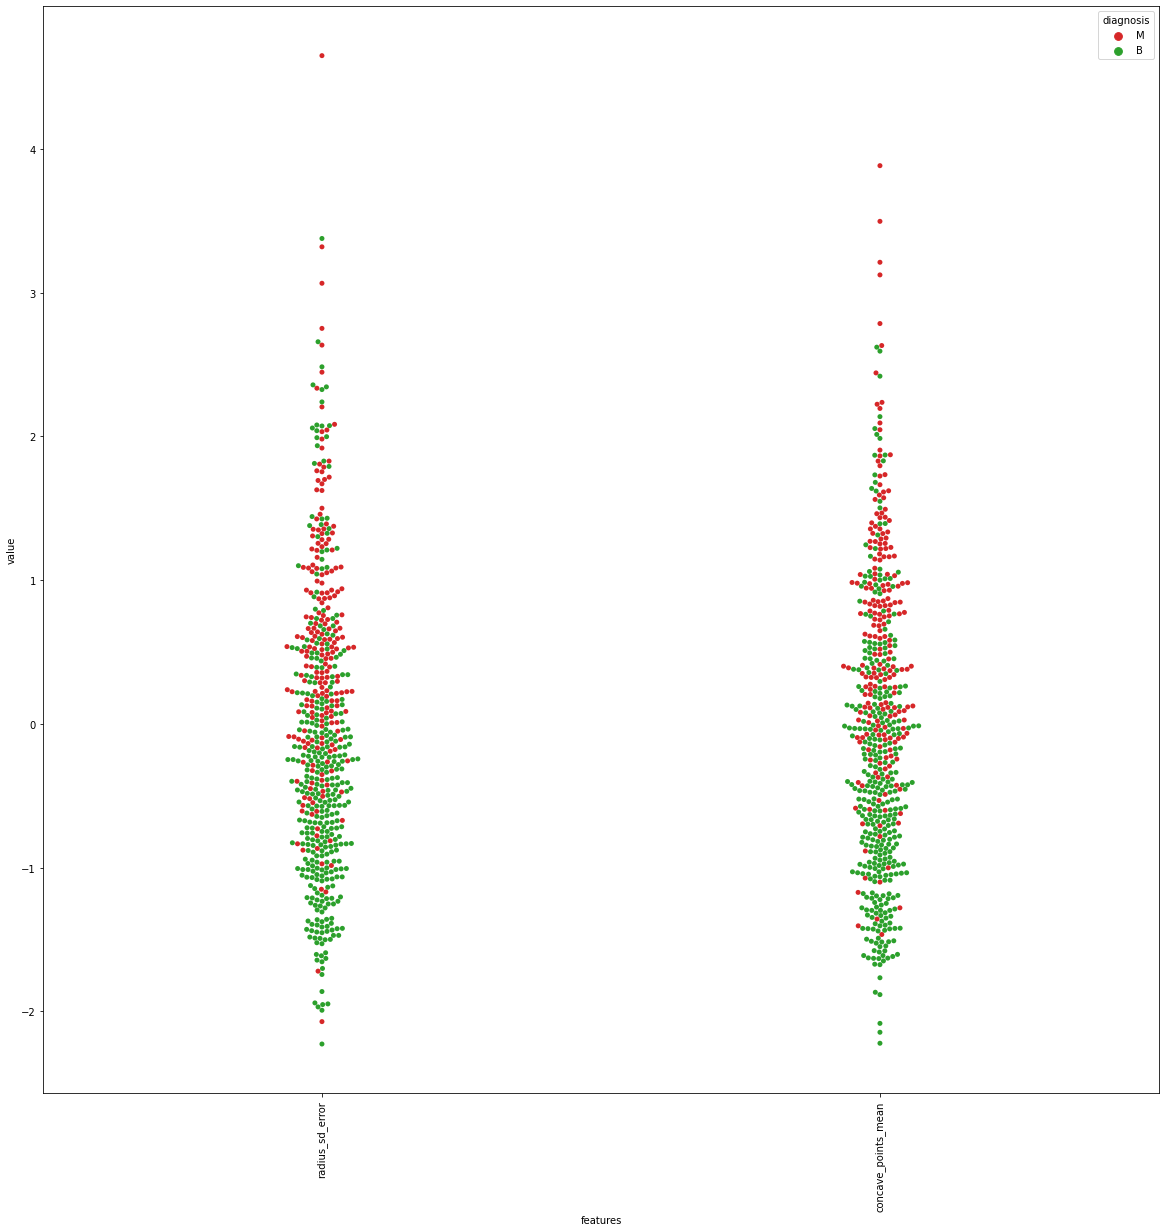

In [17]:
group4 = x[['radius_sd_error','concave_points_mean']]

group4_d = y
group4_n_2 = (group4 - group4.mean()) / (group4.std())            
group4 = pd.concat([y,group4_n_2],axis=1)
group4 = pd.melt(group4,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=group4,split=True, inner="quart",palette = ['tab:red', 'tab:green'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,20))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=group4,palette = ['tab:red', 'tab:green'])

plt.xticks(rotation=90)

concave_points_mean seems to be the best classifier for Group 4

Proceed to drop the nonselected columns, keep Concavity_worst and smoothness_mean

In [18]:
x_1 = x.drop(['radius_mean','radius_worst','radius_sd_error','texture_mean','concave_points_sd_error','concave_points_worst','area_sd_error','smoothness_sd_error','perimeter_mean','perimeter_sd_error','symmetry_sd_error','symmetry_worst'],axis=1)
samples_x = samples_x.drop(['radius_mean','radius_worst','radius_sd_error','texture_mean','concave_points_sd_error','concave_points_worst','area_sd_error','smoothness_sd_error','perimeter_mean','perimeter_sd_error','symmetry_sd_error','symmetry_worst'],axis=1)


### Feature selection <a class="anchor" id="step10"></a>

### Random forest feature classification method 

Accuracy is:  0.935672514619883


<AxesSubplot:>

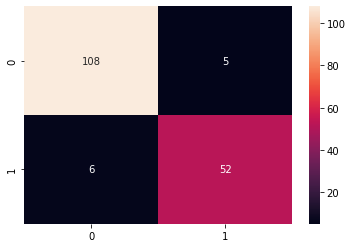

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Feature ranking:
1. feature 15 (0.319882)
2. feature 12 (0.243868)
3. feature 5 (0.091539)
4. feature 1 (0.069375)
5. feature 13 (0.038007)
6. feature 9 (0.031870)
7. feature 14 (0.030910)
8. feature 16 (0.026546)
9. feature 8 (0.021840)
10. feature 17 (0.021431)
11. feature 3 (0.019309)
12. feature 7 (0.014587)
13. feature 0 (0.014127)
14. feature 6 (0.012845)
15. feature 11 (0.012167)
16. feature 4 (0.011403)
17. feature 10 (0.010497)
18. feature 2 (0.009795)


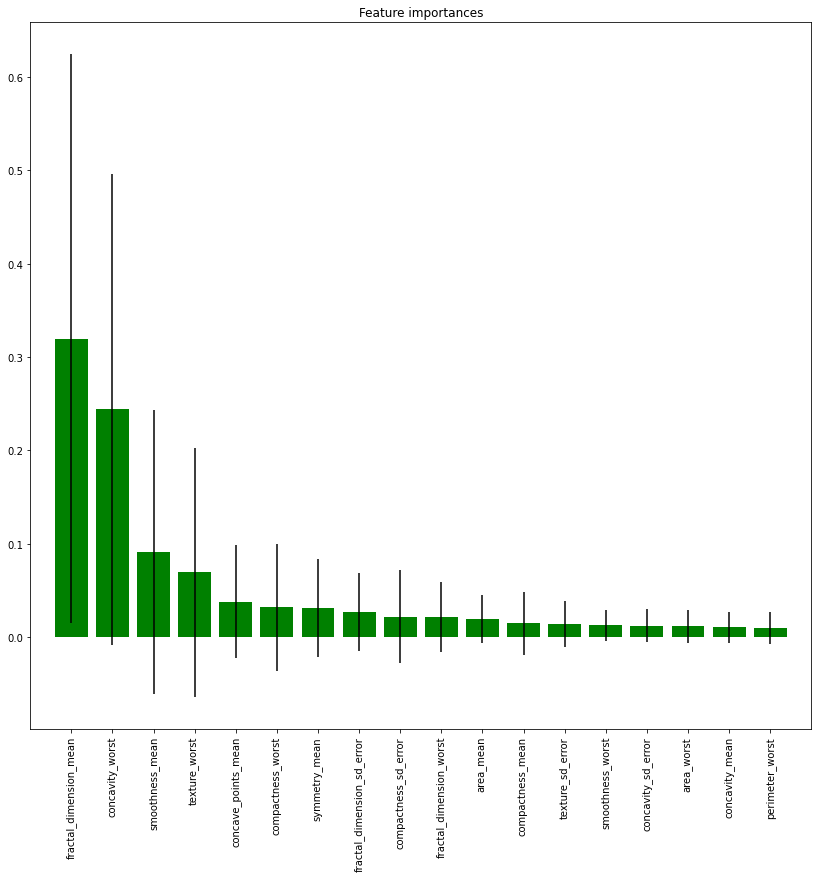

In [20]:
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Top 3 features are
 1. fractal_dimension_mean
 2. concavity_worst
 3. smoothness_mean
 
 This indicates that a higher value in these features increases the probability of a Malign diagnosis

     fractal_dimension_mean  concavity_worst  smoothness_mean
0                    0.2654           25.380            8.589
1                    0.1860           24.990            3.398
2                    0.2430           23.570            4.585
3                    0.2575           14.910            3.445
4                    0.1625           22.540            5.438
..                      ...              ...              ...
564                  0.2216           25.450            7.673
565                  0.1628           23.690            5.203
566                  0.1418           18.980            3.425
567                  0.2650           25.740            5.772
568                  0.0000            9.456            2.548

[569 rows x 3 columns]


(array([0, 1, 2]),
 [Text(0, 0, 'fractal_dimension_mean'),
  Text(1, 0, 'concavity_worst'),
  Text(2, 0, 'smoothness_mean')])

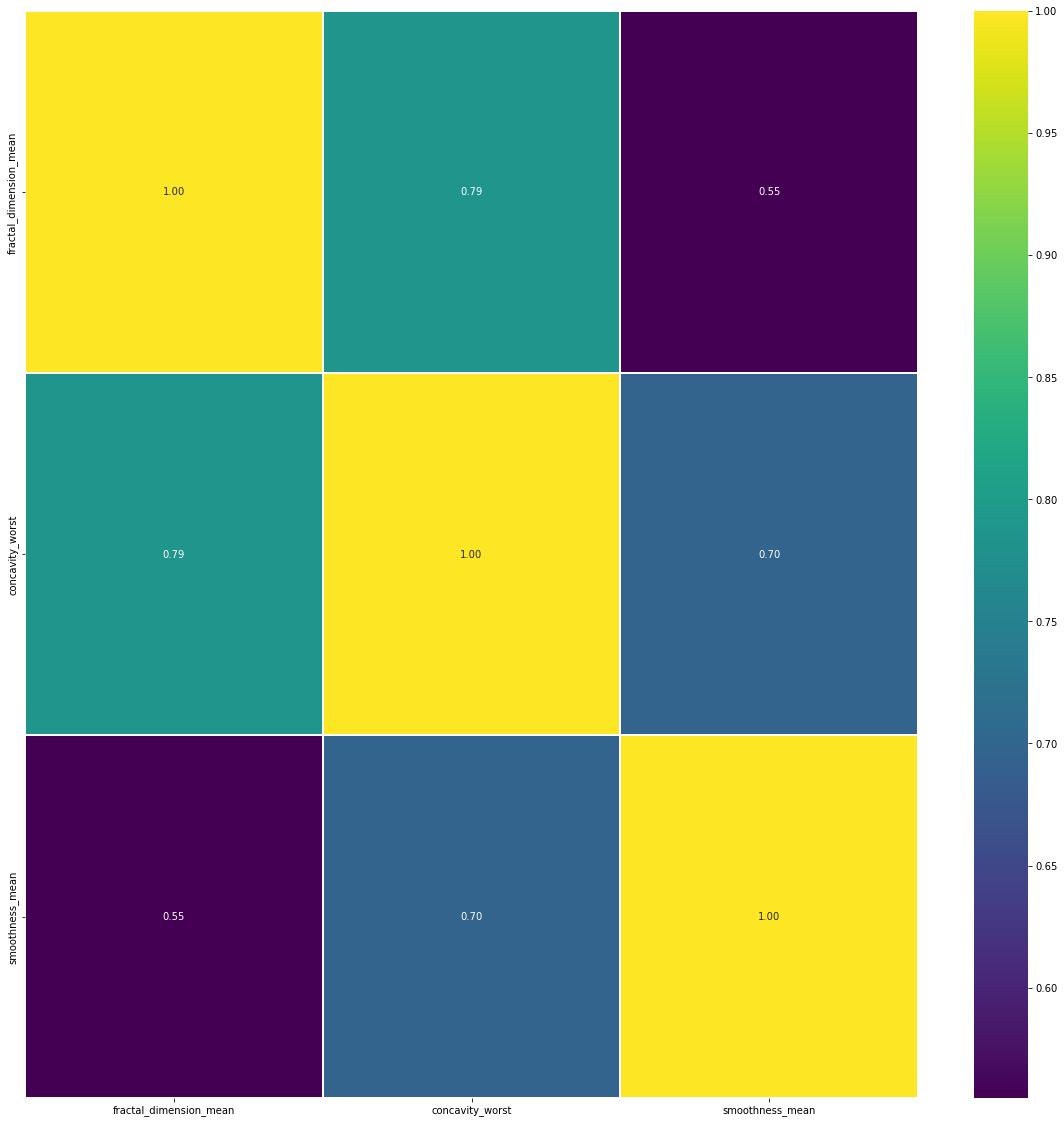

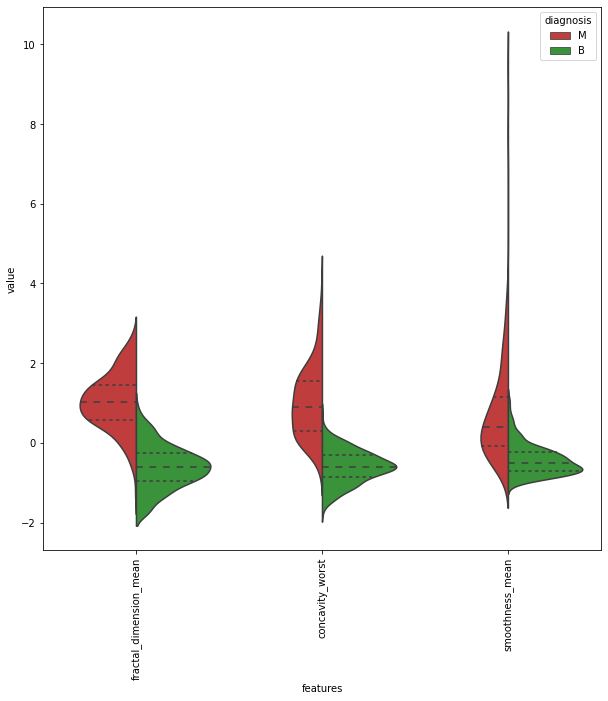

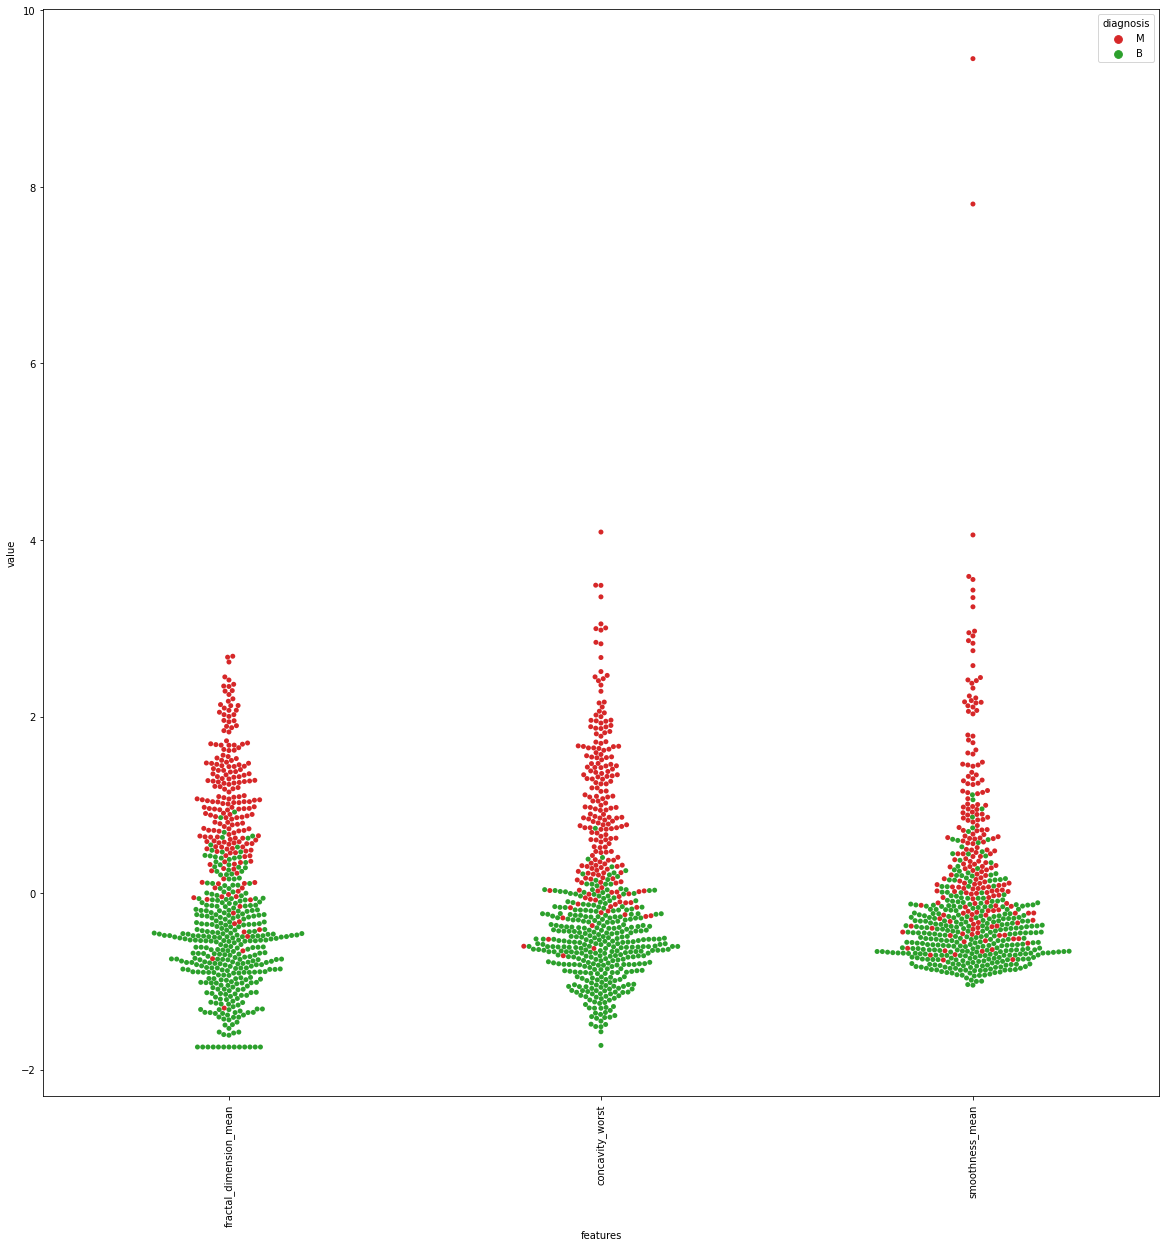

In [21]:
var = x_1[['fractal_dimension_mean','concavity_worst','smoothness_mean']]
print(var)
#heatmap correlation matrix 
a,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(var.corr(), annot=True, linewidths=.25, fmt= '.2f',ax=ax ,  cmap='viridis')


var1_n_2 = (var - var.mean()) / (var.std())            
var1= pd.concat([y,var1_n_2],axis=1)
var1 = pd.melt(var1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=var1,split=True, inner="quart",palette = ['tab:red', 'tab:green'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,20))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=var1,palette = ['tab:red', 'tab:green'])

plt.xticks(rotation=90)



# Modeling
 <a class="anchor" id="step11"></a>

In [23]:

# split data train 70 % and test 30 %

#Bootstrap Samples All variables
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(samples_x,samples_y, test_size=0.3, random_state=42)

#All non correlated variables
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)


#Top3 Features
x_train1, x_test1, y_train1, y_test1 = train_test_split(var, y, test_size=0.3)

LR = LogisticRegression(solver='lbfgs', max_iter=5000 )

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train_s, y_train_s, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time_s = scores['fit_time'].mean()
LR_score_time_s = scores['score_time'].mean()
LR_accuracy_s = scores['test_accuracy'].mean()
LR_precision_s = scores['test_precision_macro'].mean()
LR_recall_s = scores['test_recall_macro'].mean()
LR_f1_s = scores['test_f1_weighted'].mean()
LR_roc_s = scores['test_roc_auc'].mean()



scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train1, y_train1, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time1 = scores['fit_time'].mean()
LR_score_time1 = scores['score_time'].mean()
LR_accuracy1 = scores['test_accuracy'].mean()
LR_precision1 = scores['test_precision_macro'].mean()
LR_recall1 = scores['test_recall_macro'].mean()
LR_f1_1 = scores['test_f1_weighted'].mean()
LR_roc1 = scores['test_roc_auc'].mean()



random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train1, y_train1, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train_s, y_train_s, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time_s = scores['fit_time'].mean()
forest_score_time_s = scores['score_time'].mean()
forest_accuracy_s = scores['test_accuracy'].mean()
forest_precision_s = scores['test_precision_macro'].mean()
forest_recall_s = scores['test_recall_macro'].mean()
forest_f1_s = scores['test_f1_weighted'].mean()
forest_roc_s = scores['test_roc_auc'].mean()


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train1, y_train1, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time1 = scores['fit_time'].mean()
forest_score_time1 = scores['score_time'].mean()
forest_accuracy1 = scores['test_accuracy'].mean()
forest_precision1 = scores['test_precision_macro'].mean()
forest_recall1 = scores['test_recall_macro'].mean()
forest_f1_1 = scores['test_f1_weighted'].mean()
forest_roc1 = scores['test_roc_auc'].mean()




models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression - All', 'Random Forest - All','Logistic Regression - Samples', 'Random Forest - Samples','Logistic Regression - Top 3', 'Random Forest - Top 3'],
    'Fitting time': [LR_fit_time, forest_fit_time,LR_fit_time_s, forest_fit_time_s,LR_fit_time1, forest_fit_time1],
    'Scoring time': [LR_score_time, forest_score_time,LR_score_time_s, forest_score_time_s,LR_score_time1, forest_score_time1],
    'Accuracy'    : [LR_accuracy, forest_accuracy, LR_accuracy_s, forest_accuracy_s, LR_accuracy1, forest_accuracy1 ],
    'Precision'   : [LR_precision, forest_precision,LR_precision_s, forest_precision_s,LR_precision1, forest_precision1],
    'Recall'      : [LR_recall,  forest_recall,LR_recall_s,  forest_recall_s,LR_recall1,  forest_recall1],
    'F1_score'    : [LR_f1, forest_f1,LR_f1_s, forest_f1_s,LR_f1_1, forest_f1_1],
    'AUC_ROC'     : [LR_roc, forest_roc,LR_roc_s, forest_roc_s,LR_roc1, forest_roc1],
    }, columns = ['Model','Accuracy',  'Precision', 'Recall', 'F1_score', 'AUC_ROC', 'Fitting time', 'Scoring time',])

models_initial.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC,Fitting time,Scoring time
3,Random Forest - Samples,1.000000,1.000000,1.000000,1.000000,1.000000,0.494119,0.024475
2,Logistic Regression - Samples,0.962962,0.963622,0.957079,0.962811,0.993896,0.085059,0.011869
5,Random Forest - Top 3,0.939737,0.941532,0.932097,0.939334,0.981319,0.100825,0.017473
0,Logistic Regression - All,0.934474,0.943008,0.923546,0.932997,0.986344,0.016351,0.003623
1,Random Forest - All,0.932237,0.932157,0.924679,0.931851,0.982143,0.096477,0.018694
4,Logistic Regression - Top 3,0.917237,0.920571,0.901763,0.915873,0.972985,0.006566,0.003426


#### This shows that using all features sampled and otherwise provide great accuracy but with some apparent overfitting. 
#### Top 3 Features provide Accuracy and Recall (Malign positive) above 90% which is a great result to predict the result based on 3 features alone.

#### Overfitting can be improved by checking correlations again and trying additional classification models.  <a class="anchor" id="step10"></a>

# Explanation



### To Technical Audiences
#### Limitations of your analysis and identify possible further steps you could take.

- There is no context in the features used for the project and feature selection can be improved. 
- Normalizing features and making class a binary field can improve feature selection and model fitting and results. 
- As features were not normalized Random Forest Classifier was leveraged, however using other classification methods would bring best features and optimal amount using cross validation.
- Bootstrapping could be improved and other sampling methods can be applied to increase sample size for the model. 
- Current testing size is 30% this can be tweaked to improve model testing. 
- Random Forest and Logistic regression are great tools for classification, however different models can be used to find the optimal model. (K-Means, SVM, etc.)


### To Non-Technical Audiences

Write a short summary of your analysis, explaining how your model works and how it performs.

Briefly explain the factors that contributed to malignant vs benign tumor identification.

-----------------------------------------------------
# DSI Instructor Task: Part 2

Code
Feel free to comment on style, library usage, or other improvements.
Methodology
Feel free to comment on the student's data setup, modeling methodology, and model evaluation.
Conceptual Understanding
Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.



## Sample 1

Below your python code submission snippet:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

#### Code
- Libraries
    - As a general Practice you want to import modules once in the same script as Python will only load it once for all the code
        - line 18: 'from sklearn.cross_validation import cross_val_score' ...is duplicated and not needed.
    - Adding all and only the modules to be used at the top is usually a good practice to understand which libraries will be needed throughout the code. 
        - line 2 (numpy) and line 19 (train_test_split)  are not needed as they are not used in the snippet, however if the plan is to use them, then add them in line 5 and onwards.  
    - When importing sklearn models make sure you are using the correct function reference, for more details you can check:
    https://scikit-learn.org/stable/modules/classes.html
        - line 3 'from sklearn import LinearRegression' -> should be -> 'from sklearn.linear_model import LinearRegression'
        - line 4 'from sklearn.cross_validation import cross_val_score' -> should be -> 'from sklearn.model_selection import cross_val_score'
    - When using sklearn metrics for scoring check their correct name in here :https://scikit-learn.org/stable/modules/model_evaluation.html
         - line 20 "scoring='mean_absolute_error' " should be "scoring = 'neg_mean_absolute_error' 
"
                
- Improving readabilty 
    - Code is read more often than it is written, successful code is both functional and readable. Easy to read code and making comments helps with understanding the steps taken.
      - Great job on the comments
      - line 21: Adding text when making a print helps reading the result better.  'print(scores.mean())' -> 'print('Mean Absolute error is: ',scores.mean())'


- Variable names 
     - Variable names used in the code should be relevant and easy to reference
         - line 7: 'd = pd.read_csv('../data/train.csv')' d is not clear and is not referenced in the rest of the code, instead of d you can use data to make it relevant to the rest of your code. 
         - line 11 and line 12: 'x1' & 'x2' when working with models and regression it is best practice to use 'x' & 'y' to address the correct variable in functions and improves readability.
     - Variable names used in functions is advisable for portability of the code
         - line 20: 'cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')' instead of writing the scoring method and cv size inside the function, you can add variables 'cv = 3' and 'scoring ='neg_mean_absolute_error' 'outside and make the function read like this ->'cross_val_score(model, x2, x1, cv=cv, scoring=scoring)'
               
         

Below your code using the recommendations above

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv') 

# Setup data for prediction
y = data.SalaryNormalized
x = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
cv = 3

# Evaluate model
scores = cross_val_score(model, x, y, cv=cv, scoring=scoring)
print('Mean Absolute error is: ',scores.mean())

#### Methodology

Understanding the feature (x) being used in the model can help understand results

## Sample 2


Below your python code submission snippet:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

#### Code
- Libraries
     - Adding all and only the modules to be used at the top is usually a good practice to understand which libraries will be needed throughout the code. 
        - line 2 (numpy) is not used in the snippet. Keep if needed for future use. 
        
    - When using sklearn metrics for scoring check their correct name in here :https://scikit-learn.org/stable/modules/model_evaluation.html
         - line 20 "scoring='mean_absolute_error' " should be "scoring = 'neg_mean_absolute_error' 
                
- Improving readabilty 
    - Code is read more often than it is written, successful code is both functional and readable. Easy to read code and making comments helps with understanding the steps taken.
      - Great job on the comments
      - line 21: Adding text when making a print helps reading the result better.  'print(scores.mean())' -> 'print('Mean Absolute error is: ',scores.mean())'


- Variable names 
     - Variable names used in the code should be relevant and easy to reference
         - line 12: 'X' when naming variables keep in mind space in names and Case sensitivity for best practice keep to one naming convention. For example all variables use lower-score names -> 'x' 
     - Variable names used in functions is advisable for portability of the code
         - line 20: 'cross_val_score(model, x, y, cv=5, scoring='mean_absolute_error')' instead of writing the scoring method and cv size inside the function, you can add variables 'cv = 5' and 'scoring ='neg_mean_absolute_error' ' outside and make the function read like this ->'cross_val_score(model, x2, x1, cv=cv, scoring=scoring)'
               
         

Below your code using the recommendations above

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv') 

# Setup data for prediction
y = data.SalaryNormalized
x = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
cv = 5

# Evaluate model
scores = cross_val_score(model, x, y, cv=cv, scoring=scoring)
print('Mean Absolute error is: ',scores.mean())